In [109]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy
import timm

In [110]:
dataset = Path('/kaggle/input/imbalanced-reptile-dataset/reptile-dataset')

In [111]:
item_tfms=(Resize(720))
batch_tfms=aug_transforms(size=480, min_scale=0.75)

In [112]:
dls = ImageDataLoaders.from_folder(path=dataset, 
                                   valid_pct=0.2, 
                                   seed=42, 
                                   item_tfms=item_tfms,
                                   batch_tfms=batch_tfms,
                                   bs=16)

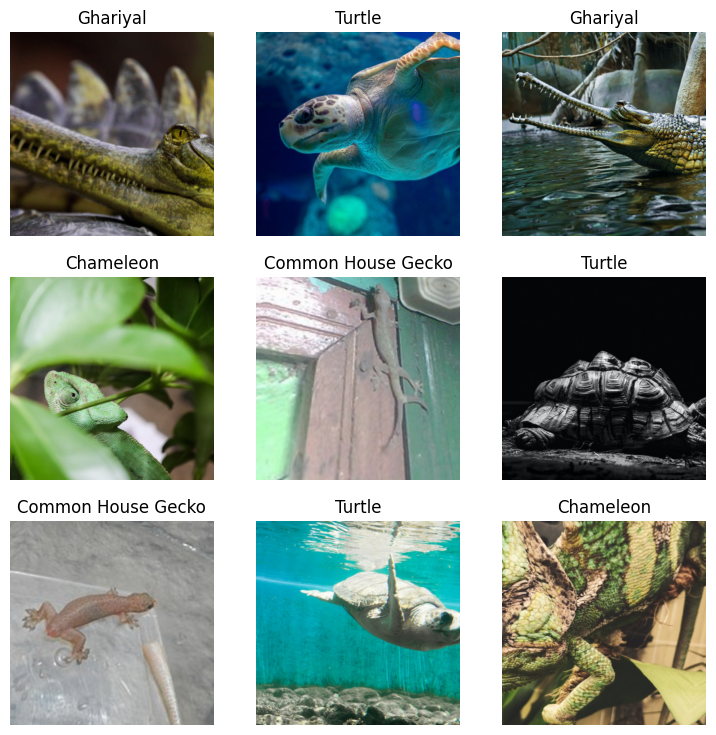

In [113]:
dls.show_batch()

In [114]:
from timm.models import*
all_models1 = timm.list_models('*xception*')
all_models1

['legacy_xception',
 'xception41',
 'xception41p',
 'xception65',
 'xception65p',
 'xception71']

In [115]:
learn = vision_learner(dls, 'xception65', model_dir="/tmp/models",metrics=[accuracy, error_rate]).to_fp16()

SuggestedLRs(valley=0.033113110810518265)

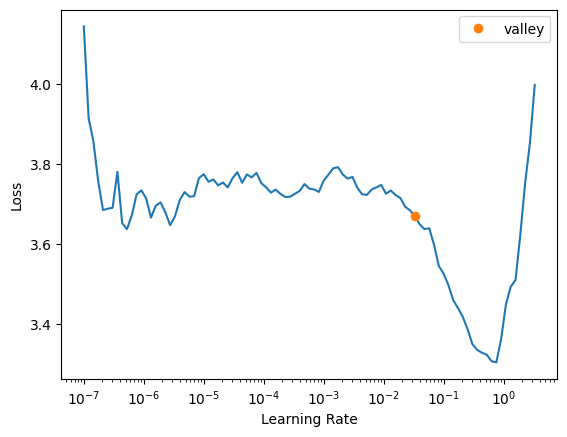

In [116]:
learn.lr_find()

In [117]:
learn.fine_tune(20, 0.04786301031708717)

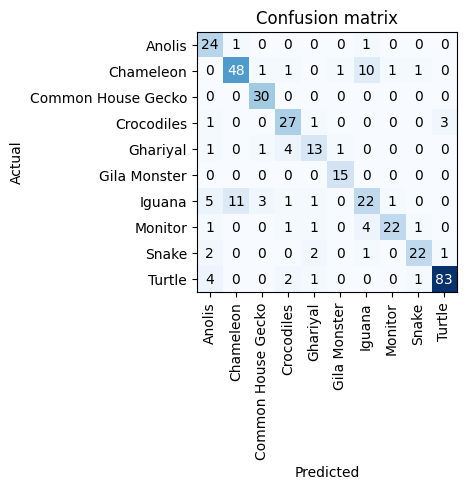

In [118]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

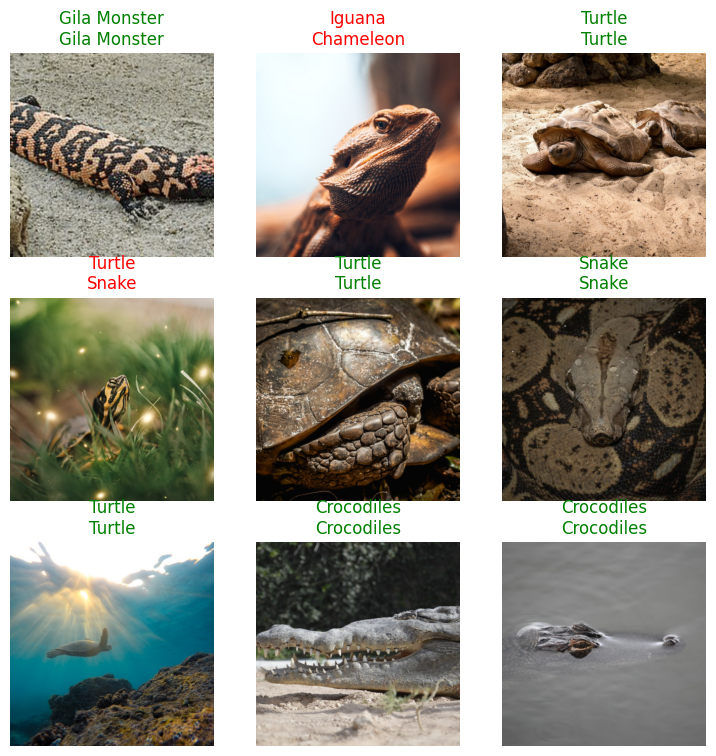

In [120]:
learn.show_results()

In [125]:
learn.save(file='/kaggle/working/reptile_weight_79')

Path('/kaggle/working/reptile_weight_79.pth')

In [ ]:
learn.save(file='reptile_weight_79')

In [134]:
learn.export('/kaggle/working/export.pkl')

In [123]:
!pwd

/kaggle/working


In [128]:
from fastai.vision.all import load_learner

In [135]:
model = load_learner('/kaggle/working/export.pkl')

In [136]:
print(model)

In [144]:
img = PILImage.create('/kaggle/input/imbalanced-reptile-dataset/reptile-dataset/Snake/Snake008.jpeg')

In [145]:
prediction = model.predict(img)

In [147]:
print(prediction)

('Common House Gecko', tensor(2), tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]))
